In [78]:
import utils
import pandas as pd
import datetime as dt
import pprint
import matplotlib.pyplot as plt
from sklearn import tree, model_selection
from pylab import rcParams
import seaborn as sb
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

df = pd.read_csv("Sessionized_SquarePanda.csv",parse_dates=True,error_bad_lines=False)
df.head()


,childid,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
0,1004,0,2016-11-07 20:34:00,Lagoon,47,F,19,WORD,Not Known,1,NaN,0
1,1005,0,2016-11-07 20:52:00,Lagoon,7,F,7,WORD,Not Known,1,NaN,0
2,1005,0,2016-11-07 20:53:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,70,F,4,WORD,Not Known,1,NaN,0


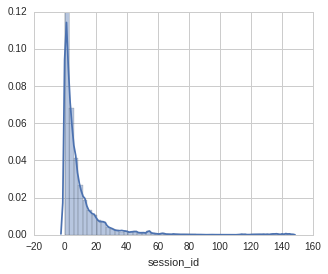

In [79]:
sb.distplot(df['session_id'])

# seaborn is good for statistical analysis

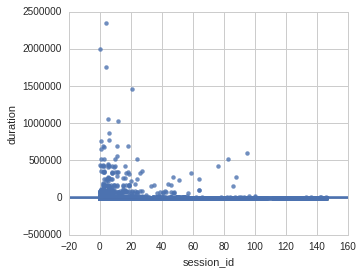

In [80]:
sb.regplot(x='session_id',y='duration',data=df,scatter=True)

### For a particular child the duration for the initial sessions is longer than the later sessions. Hence time spent on a game by a child decreases eventually

(0, 700)

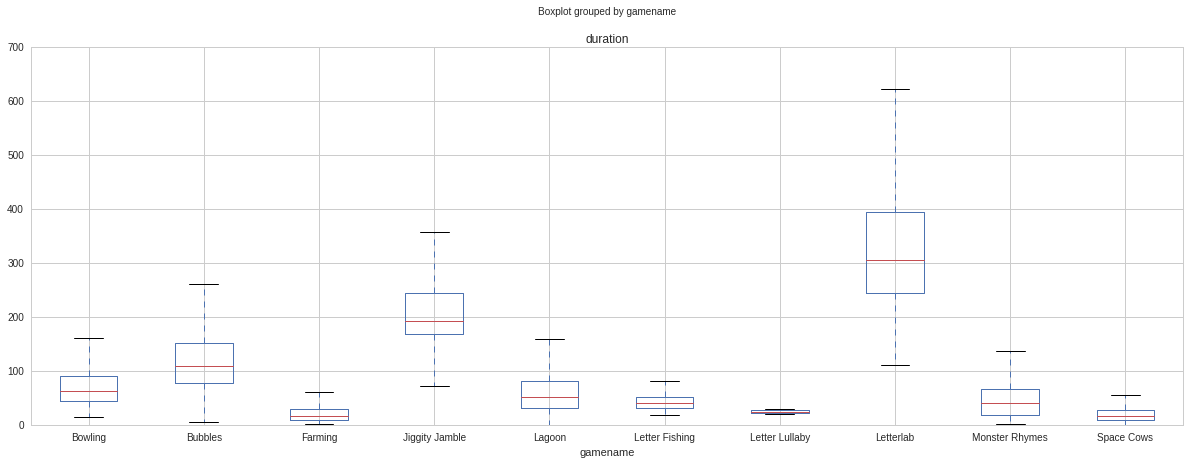

In [81]:
#df.boxplot(column='createdat',by='gender')
df.boxplot(column='duration',by='gamename',figsize=(20,7))
plt.ylim(0,700)

(0, 40)

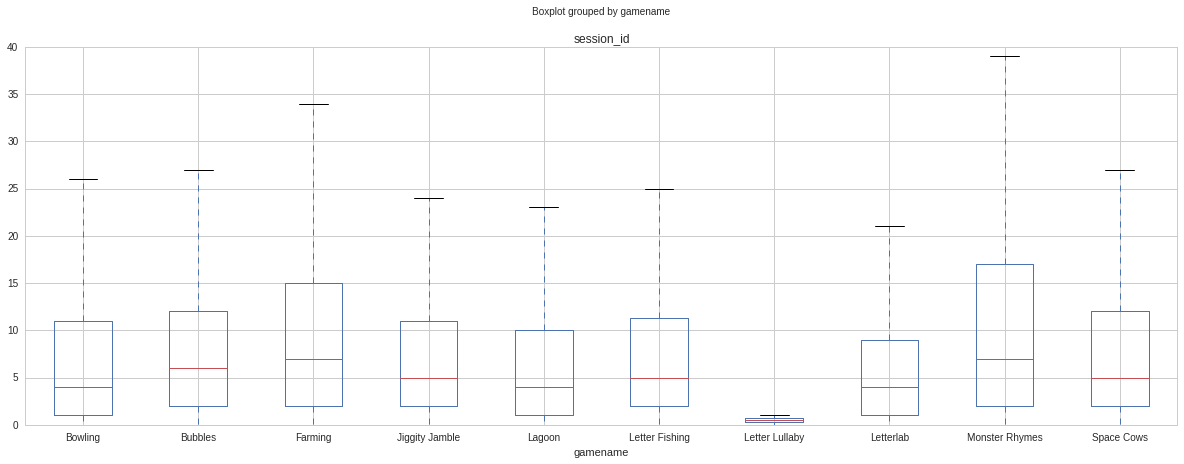

In [82]:
#df.boxplot(column='createdat',by='gender')
df.boxplot(column='session_id',by='gamename',figsize=(20,7))
plt.ylim(0,40)

### Monster Rhymes has the maximum number of sessions whereas Letter Lullaby has 0-3 sessions(Not played at all)

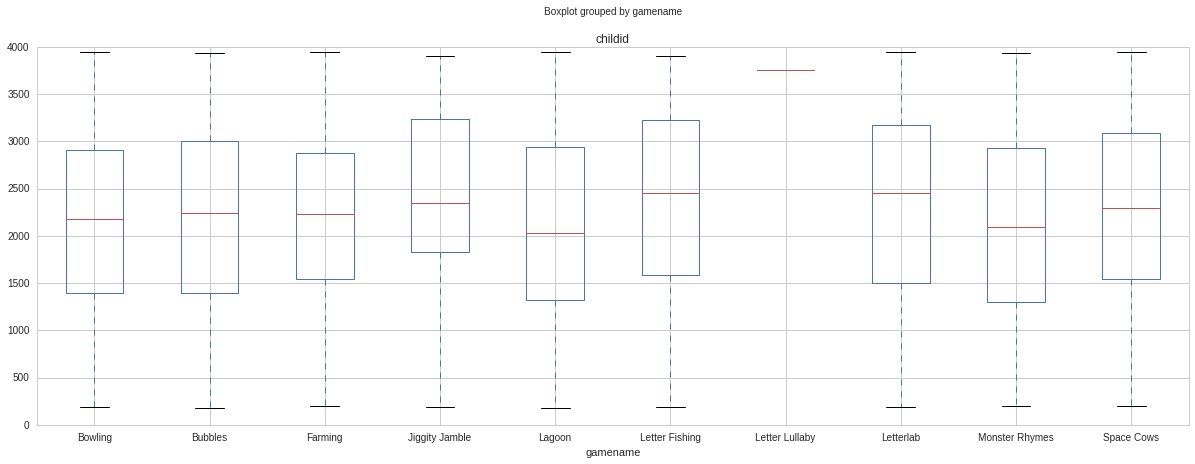

In [83]:
df.boxplot(column='childid',by='gamename',figsize=(20,7))

## As the childid is on the lower range for Farming and Monster Rhymes they seem to be games played by older users and Jiggity Jamble and Letter Fishing are newer games being used by newer users

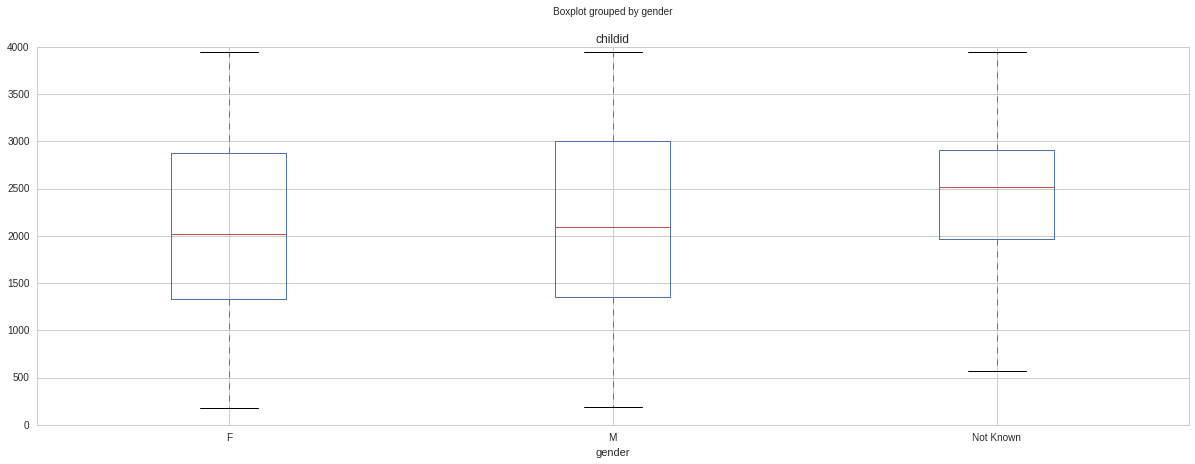

In [84]:
df.boxplot(column='childid',by='gender',figsize=(20,7))

### Equal distribution of new users by gender. (Assuming childid is in chronological order)

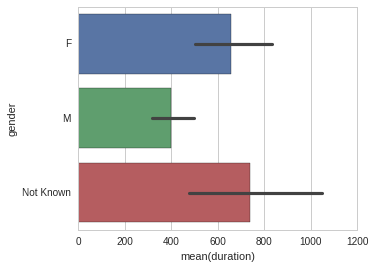

In [85]:
sb.barplot(x=df['duration'],y=df['gender'])

### Females tend to play for a longer duration compared to Males

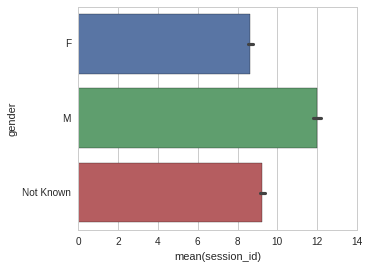

In [86]:
sb.barplot(x=df['session_id'],y=df['gender'])

### Males tend to play more often but for a lesser duration as they have significantly more count of sessions

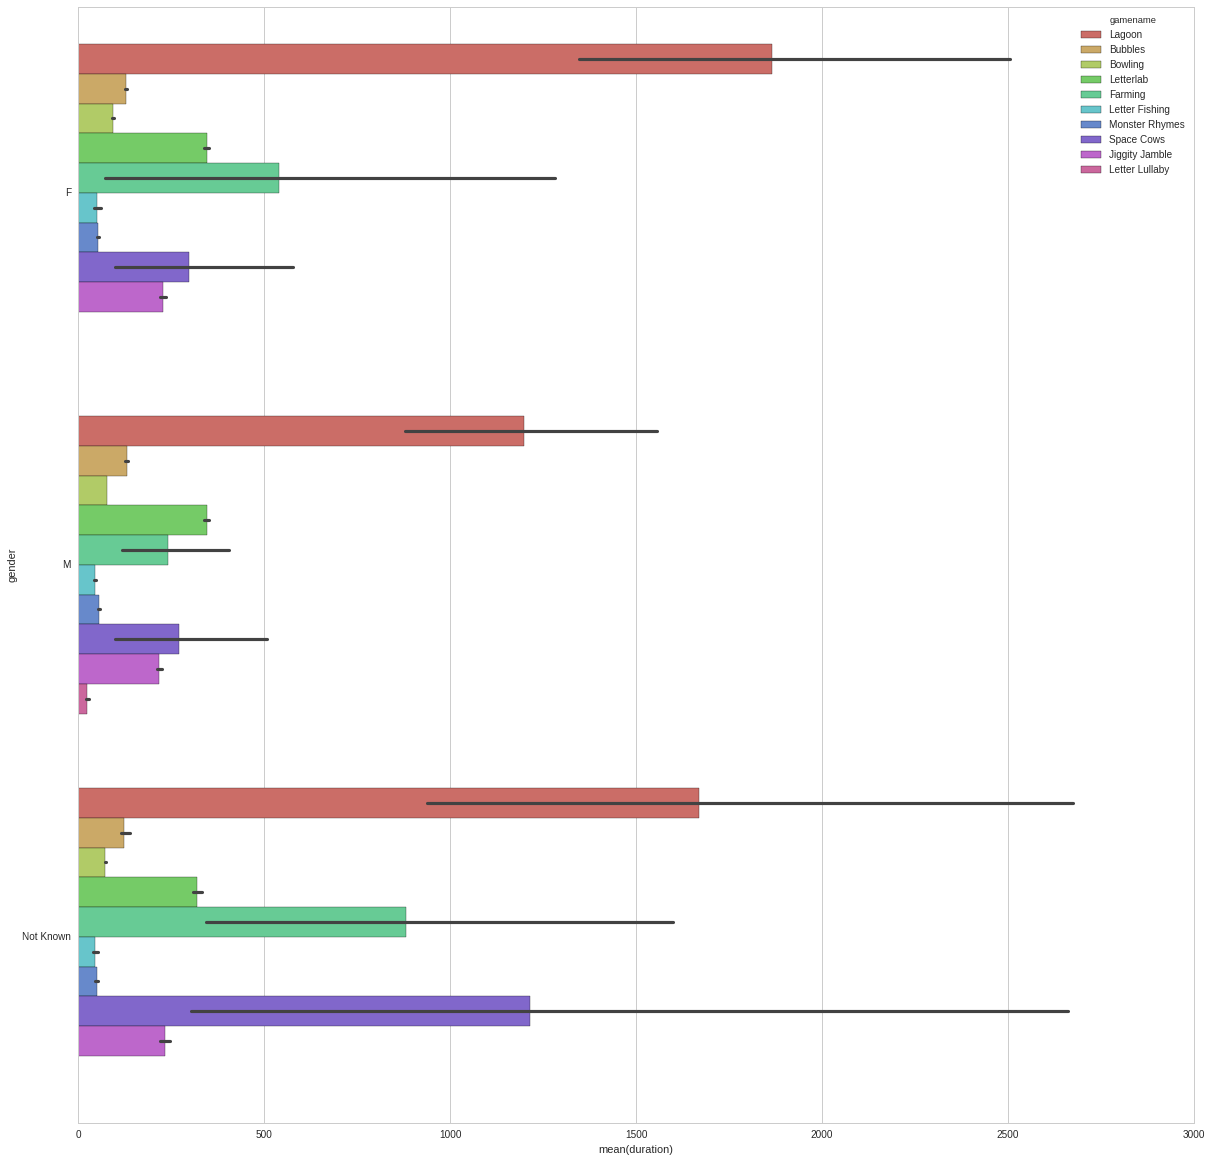

In [87]:


plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['duration'],y=df['gender'],hue=df['gamename'],palette='hls')

### Lagoon is the game played for the maximum duration and as previously explained Females tend to play it for a longer duration compared to Males
### Also, Females play Farming for a much longer duration as compared to Males

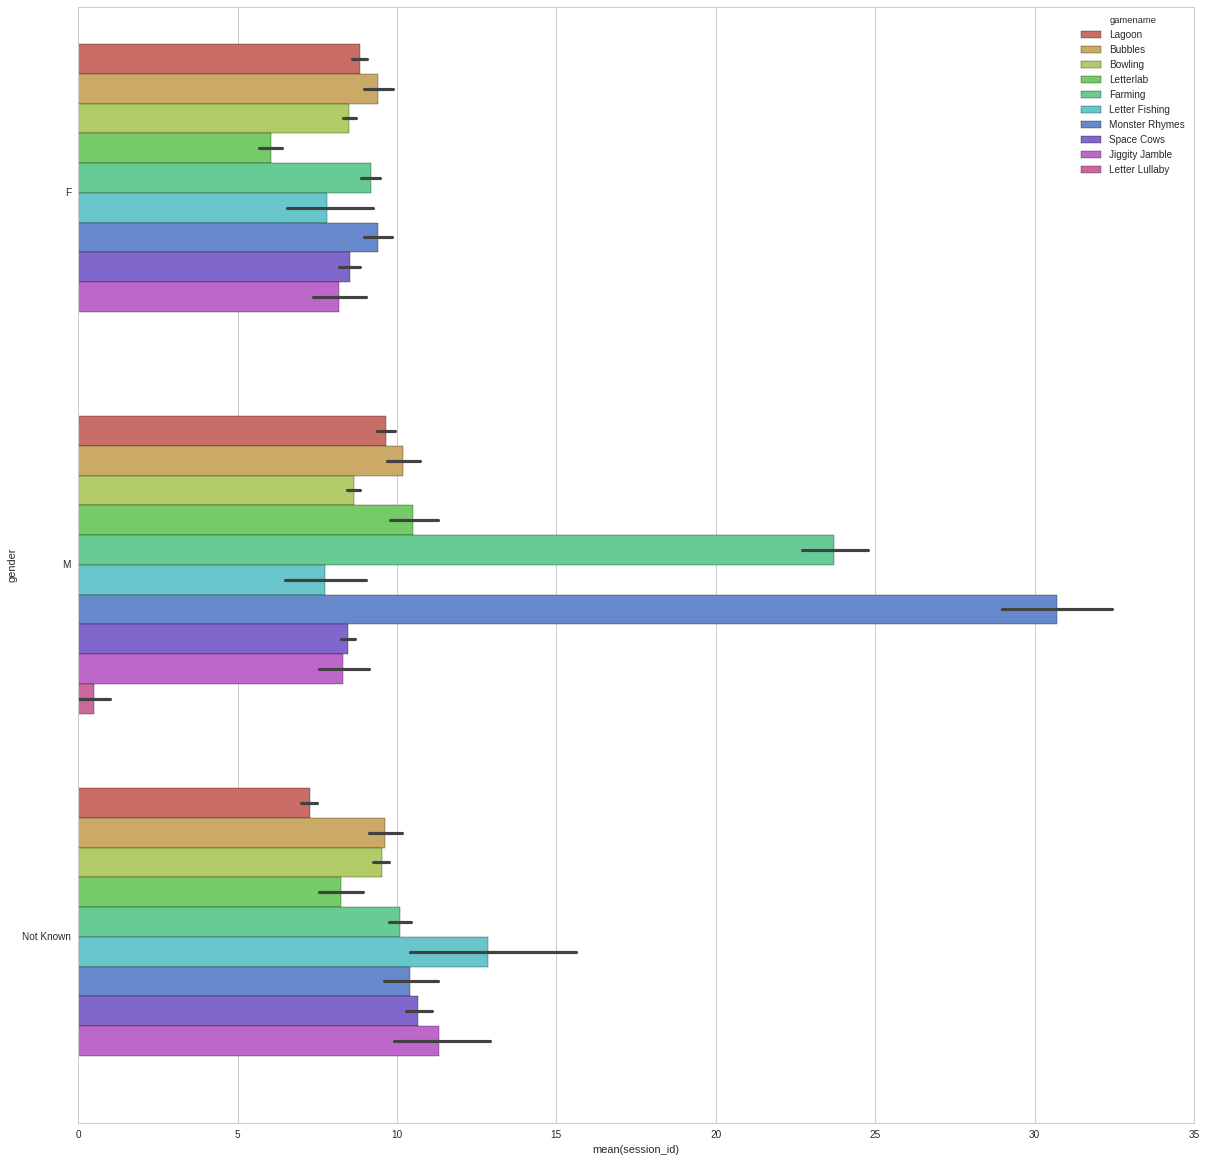

In [88]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['session_id'],y=df['gender'],hue=df['gamename'],palette='hls')



### In general Males tend to have more sessions and Monter Rhymes seems to be a very popular game amongst them
### On the contrary to previously discussed Males open Farming more often compared to Females but end up closing it right away 

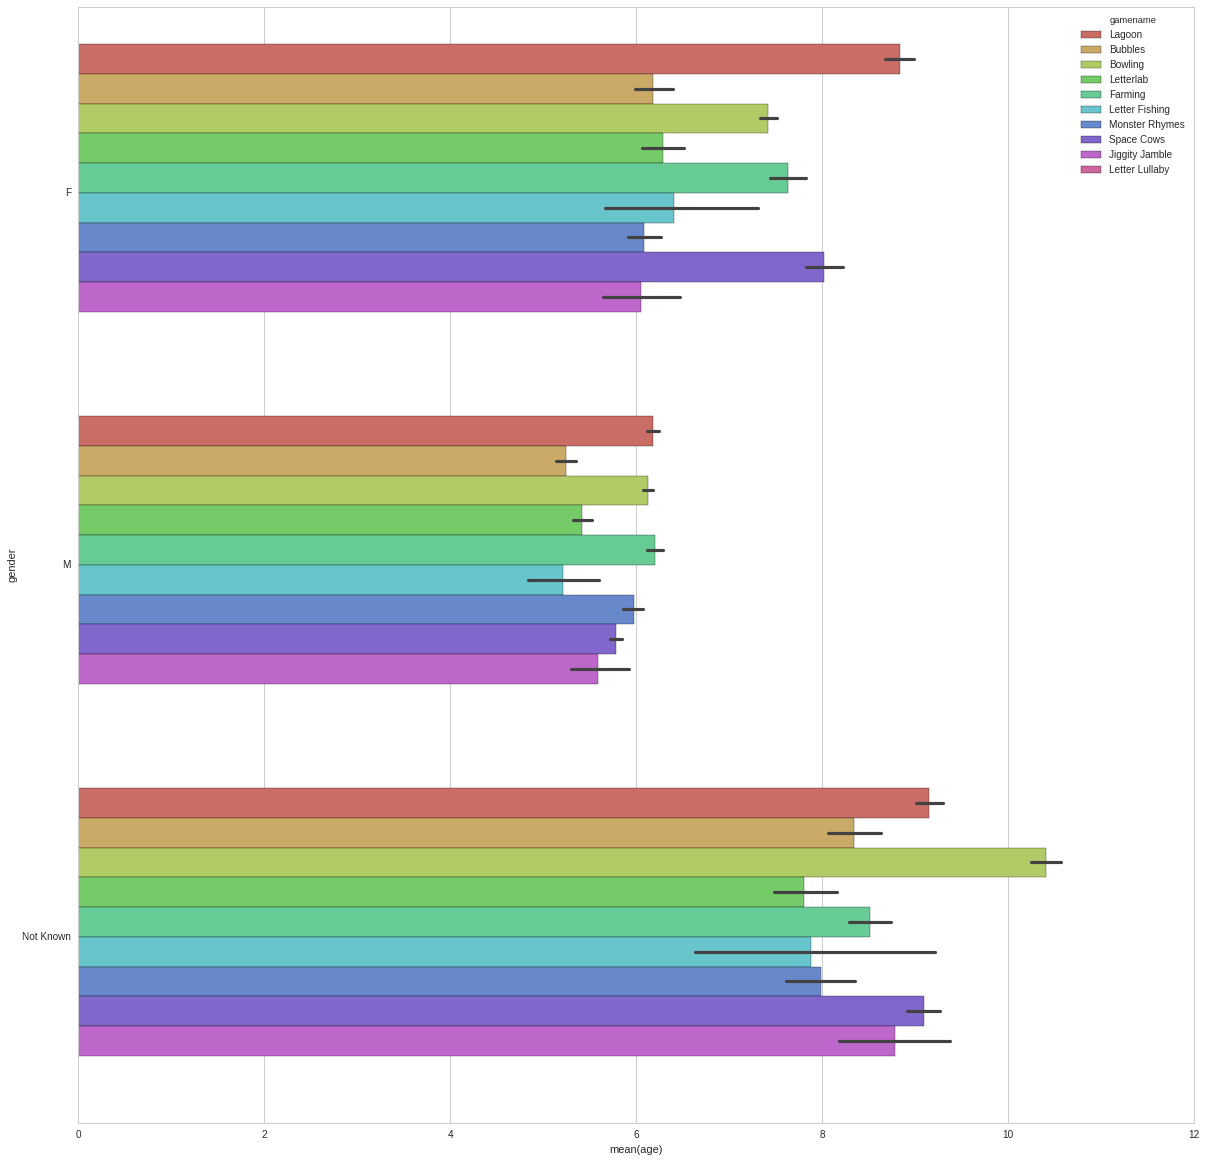

In [113]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['age'],y=df['gender'],hue=df['gamename'],palette='hls')



### Girls of comparatively higher age play our games compared to boys

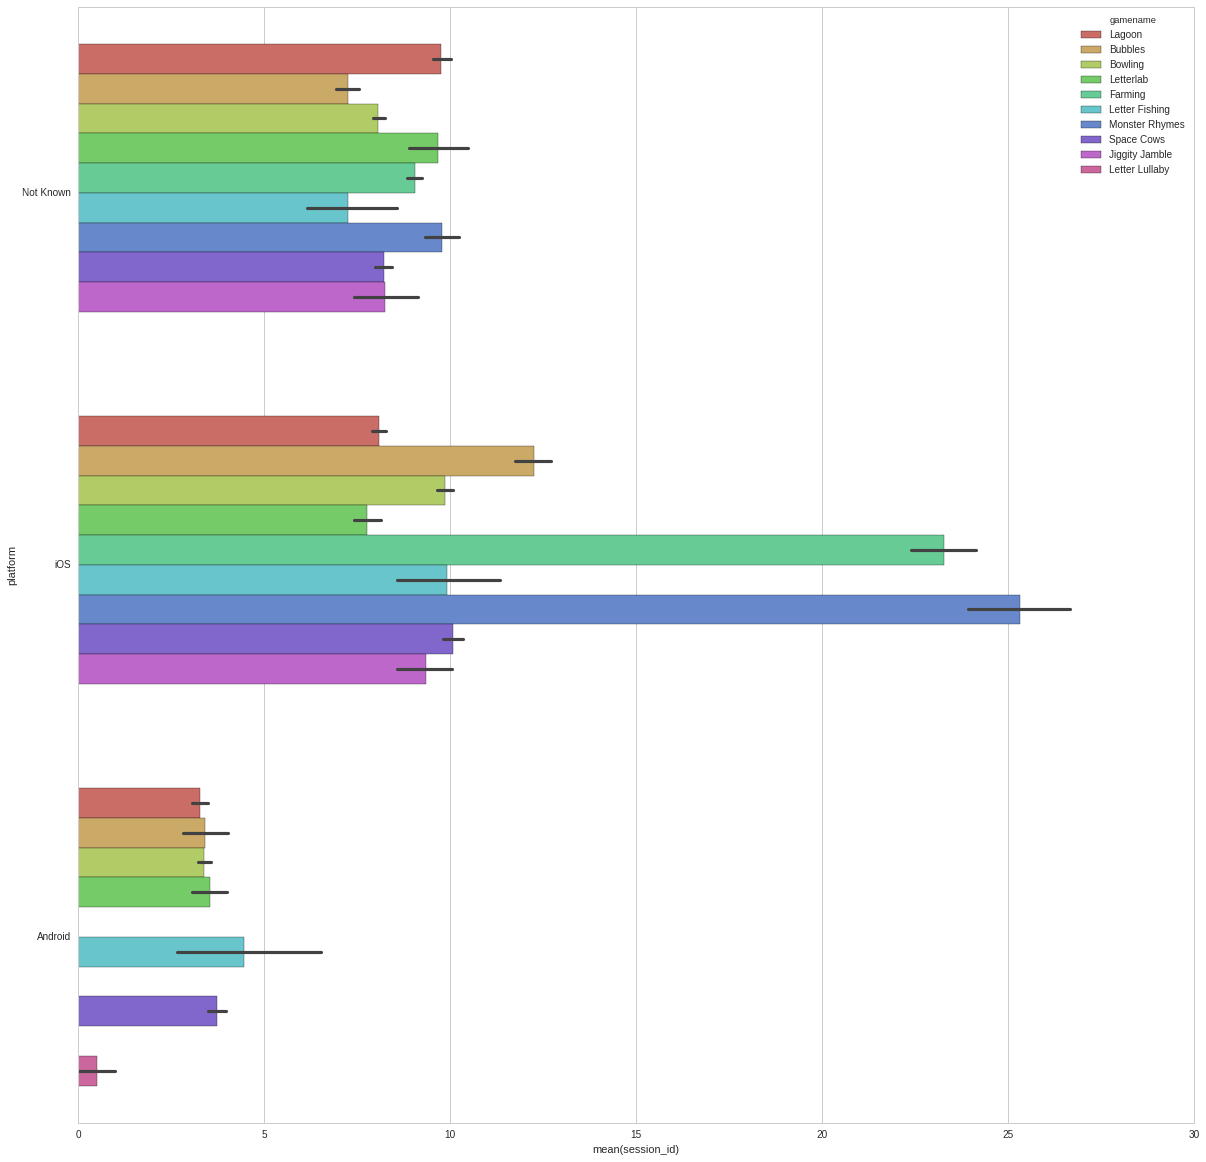

In [114]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['session_id'],y=df['platform'],hue=df['gamename'],palette='hls')



### Farming and Space Cows are played for maximum sessions on iOS platform

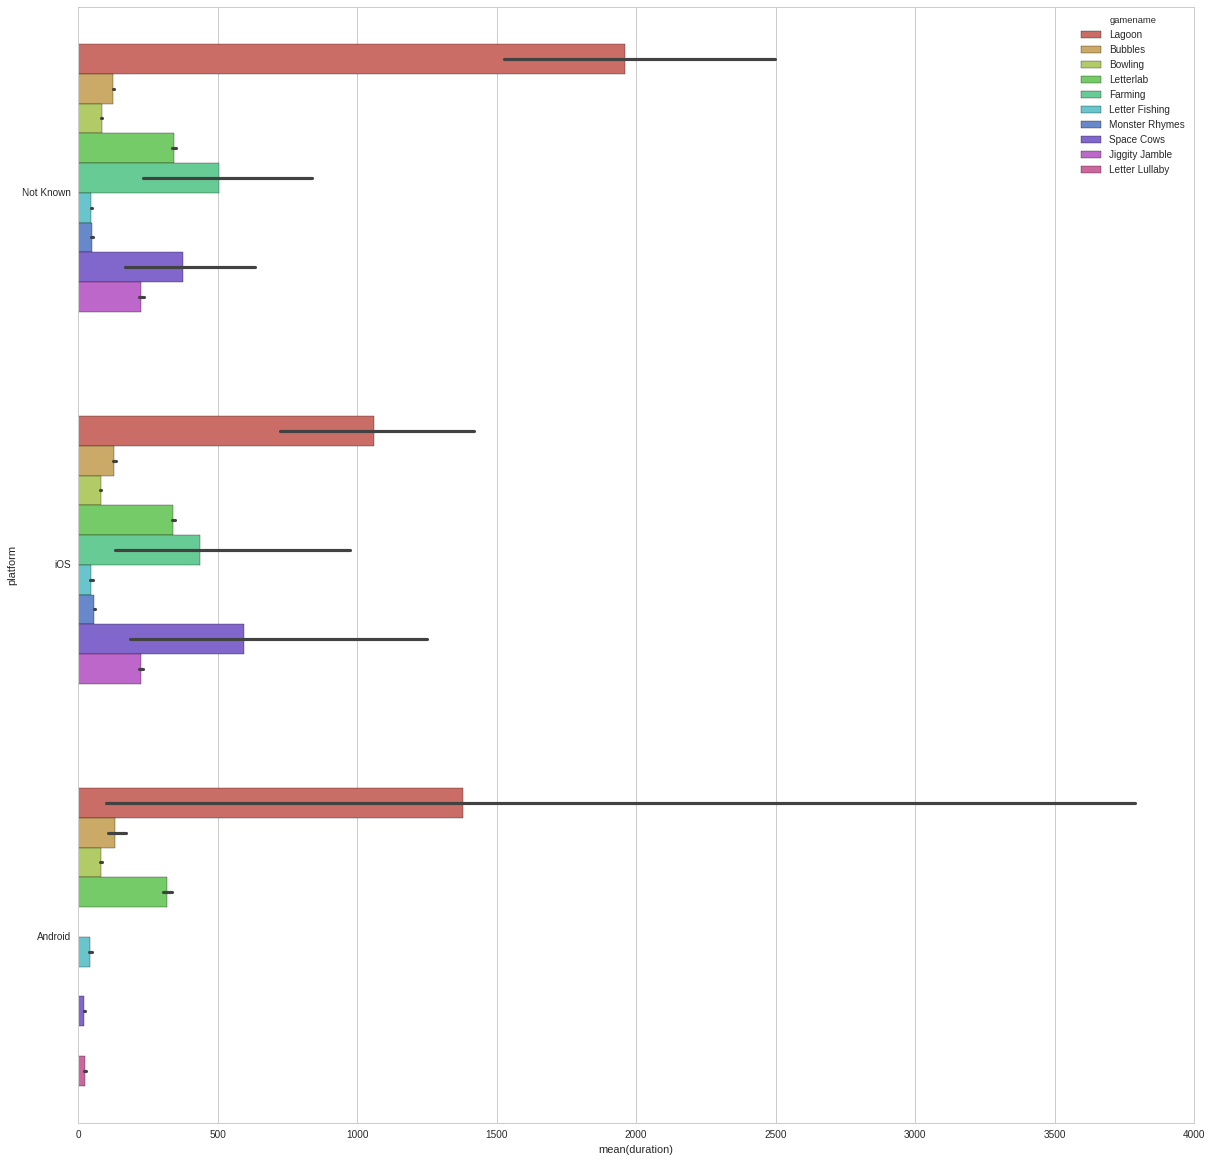

In [115]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['duration'],y=df['platform'],hue=df['gamename'],palette='hls')



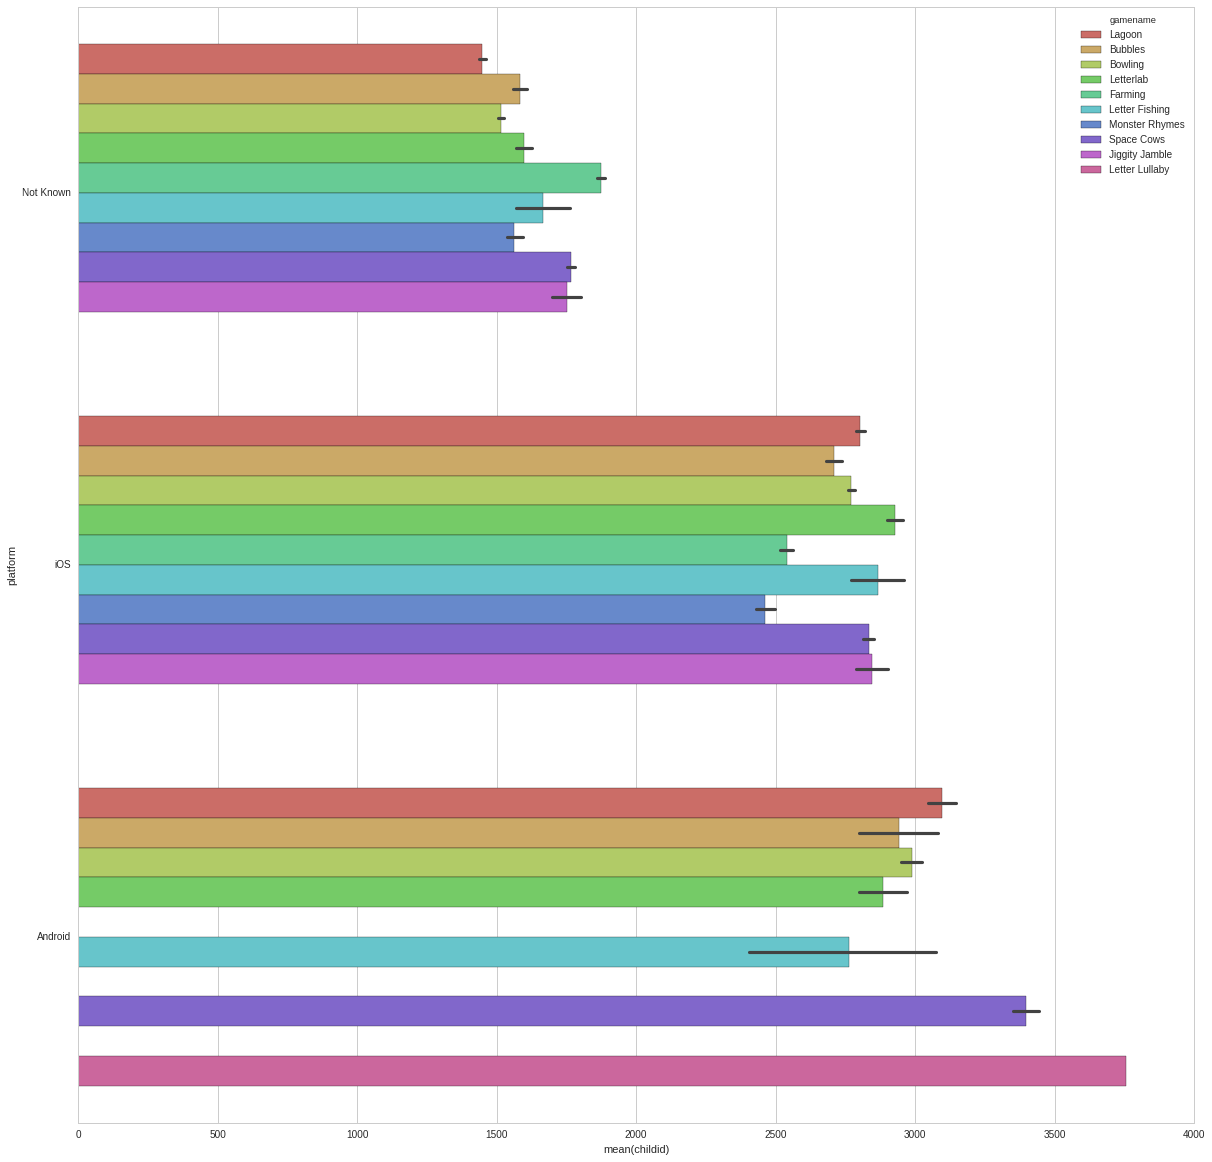

In [116]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['childid'],y=df['platform'],hue=df['gamename'],palette='hls')



### Letter Lullaby is played only on Android. Space Cows is played by more children on Android. Farming is not played on Android at all.

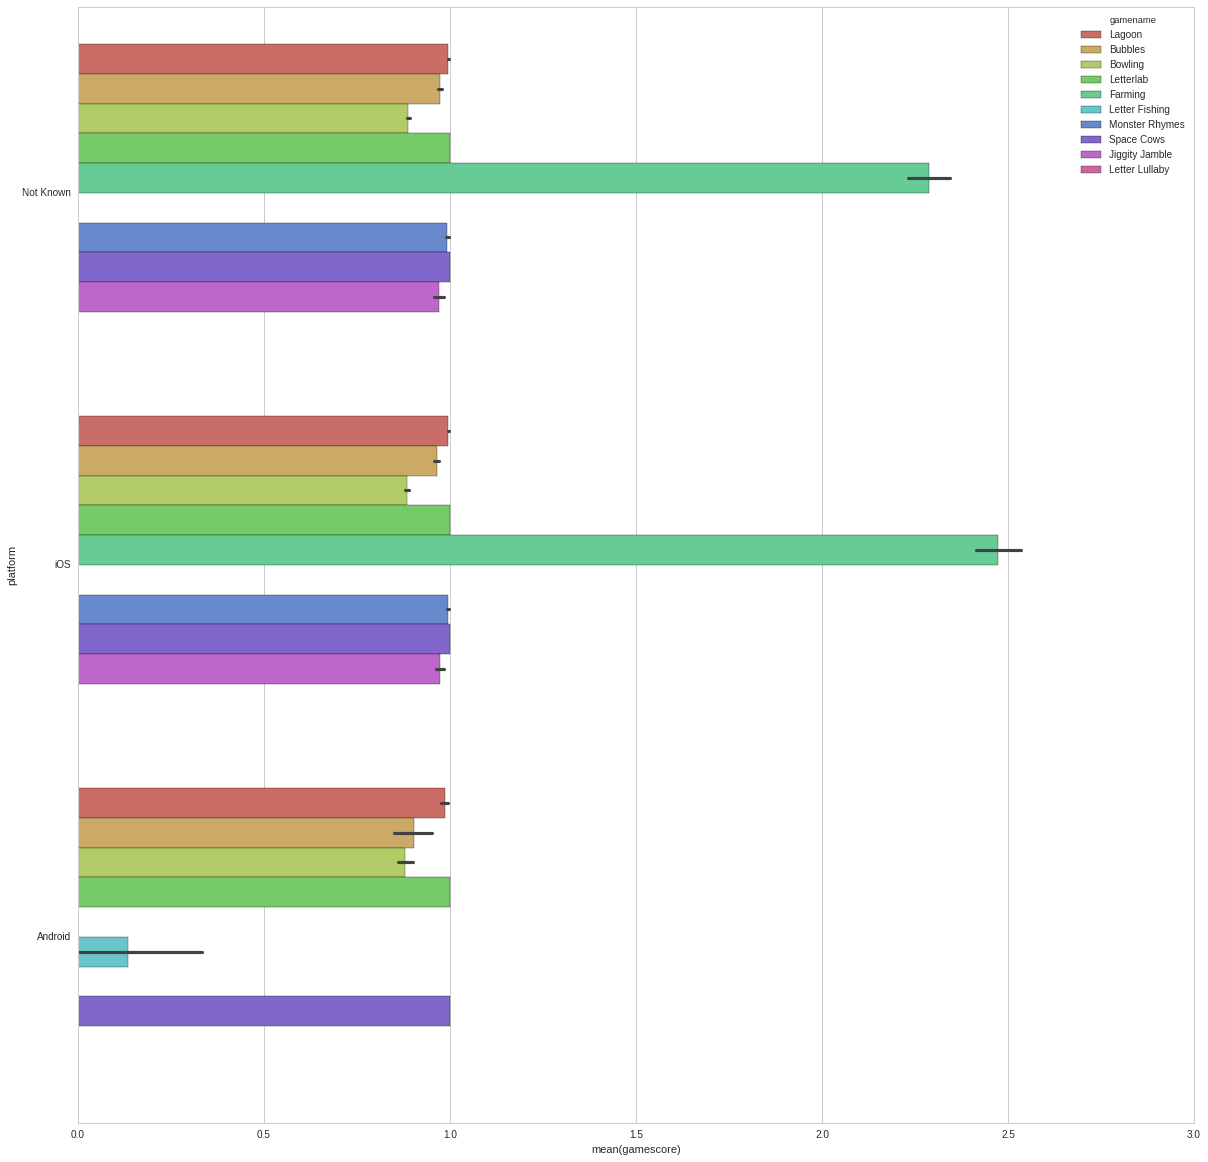

In [117]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['gamescore'],y=df['platform'],hue=df['gamename'],palette='hls')



### Jiggity Jamble and Monster Rhymes is not played on Android at all

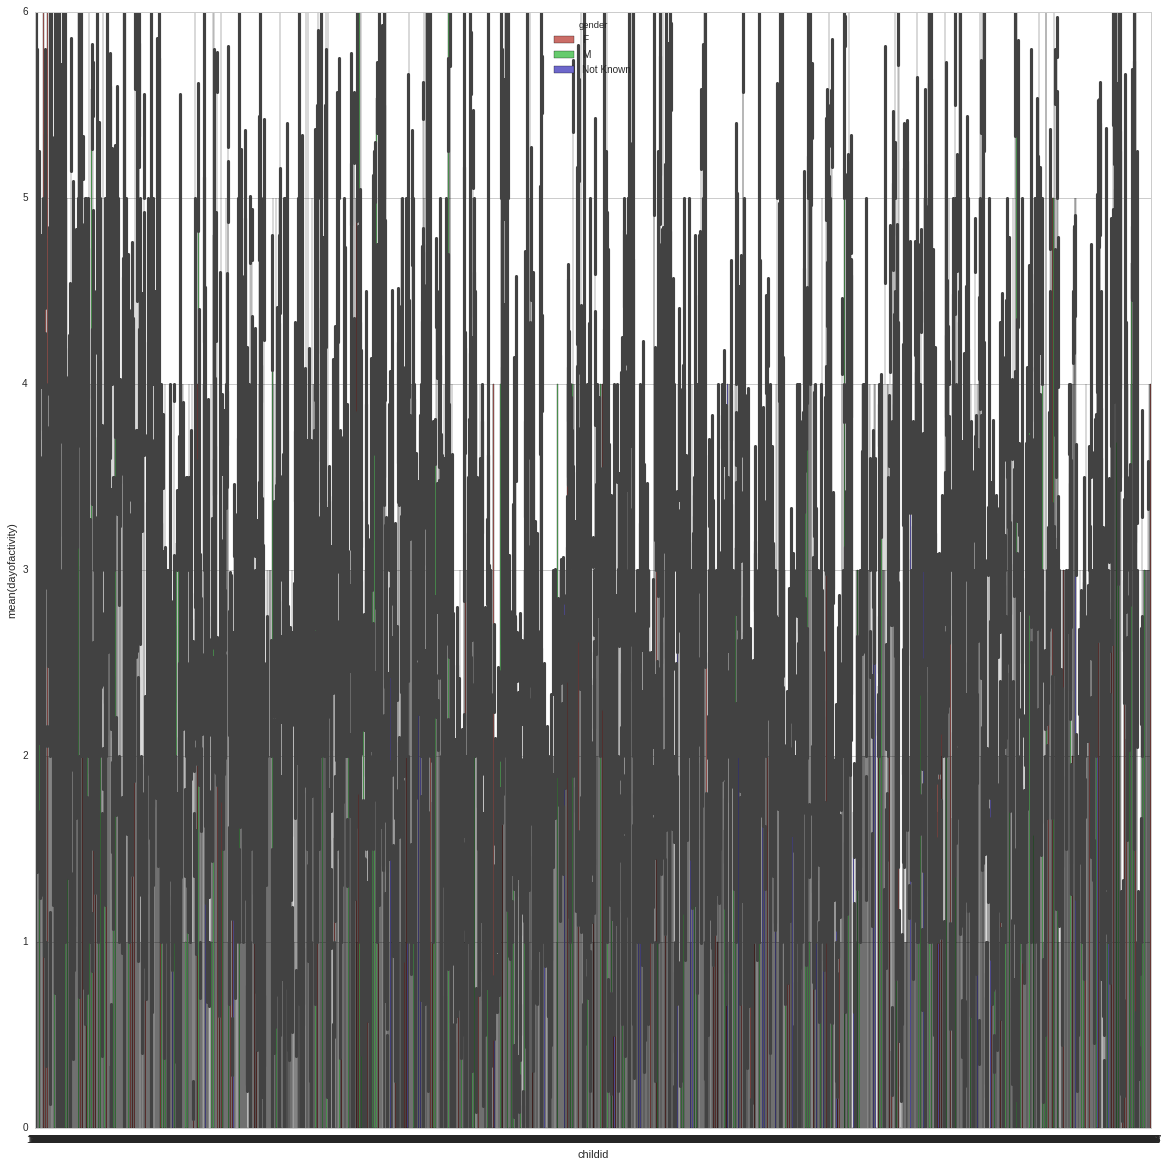

In [121]:
plt.rc("figure",figsize=(20,20))
sb.barplot(x=df['childid'],y=df['dayofactivity'],hue=df['gender'],palette='hls')

### Once females start playing they play for a longer time
### Males open various games multiple times and play for a shorter time